In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings('ignore')

In [29]:
ibm_churn = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
ibm_churn.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [30]:
ibm_churn.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [31]:
ibm_churn= ibm_churn[['Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition']]

In [34]:
ibm_churn.head(2)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,No


In [35]:
ibm_churn.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [36]:
ibm_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeCount             1470 non-null   int64 
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [37]:
ibm_churn.isna().sum()

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [38]:
ibm_churn.nunique()

Age                           43
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCom

In [16]:
ibm_churn.to_excel('ibm_attrition.xlsx', index=False)

In [39]:
ibm_churn.shape

(1470, 35)

In [41]:
# separate numerical and categorical columns
ibm_churn.columns.to_series().groupby(ibm_churn.dtypes).groups

{int64: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], object: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime', 'Attrition']}

In [43]:
#see statistics for numeric columns
ibm_churn.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


##### EmployeeCount and EmployeeNumber are unique identifiers, which will be dropped for our model. StandardHours is the same across the board so it will be dropped too. 

In [45]:
#dropping uneccessary columns
ibm_churn = ibm_churn.drop(columns = ['EmployeeNumber', 'EmployeeCount', 'StandardHours', 'Over18'])
ibm_churn.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,No


AttributeError: module 'matplotlib' has no attribute 'savefig'

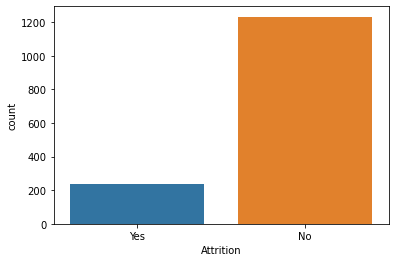

In [51]:
# check distribution for target variable (attrition):
sns.countplot(x = 'Attrition', data = ibm_churn);
plt.savefig('attrition.png')

This plot shows us we have an unbalanced dataset, where atrrition is skewed towards a value of "No" 
(many more "No's" than "Yes's" )- This is important to note when picking evaluation metrics, specifically accuracy vs recall/sensitivity and precision.

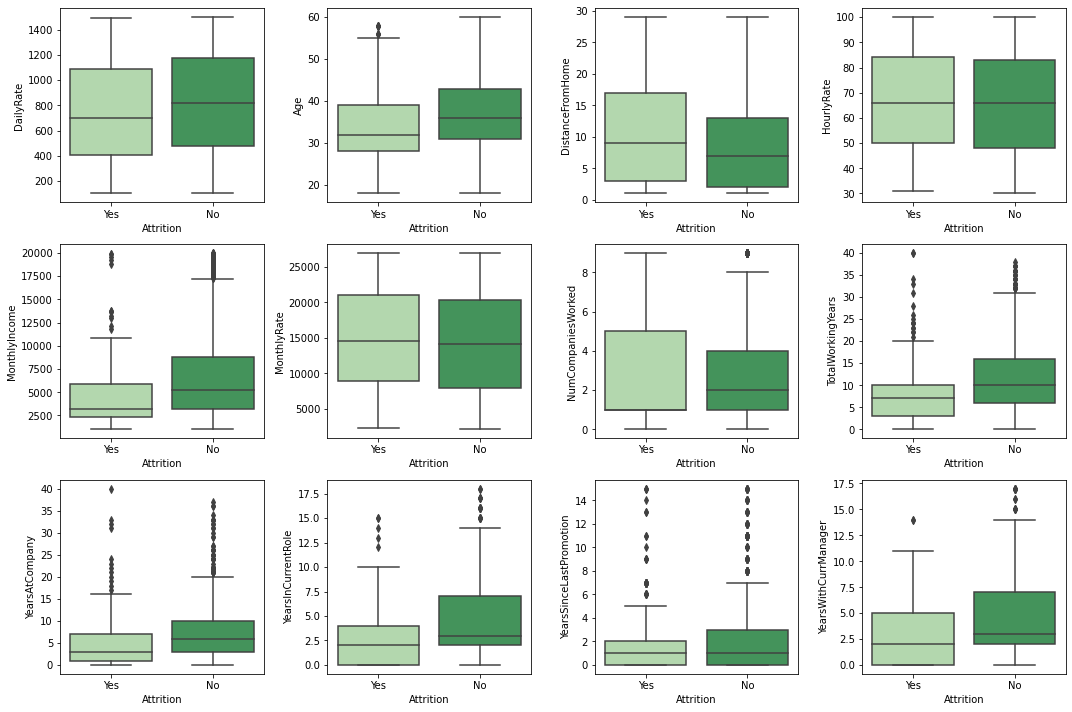

In [59]:
#visualize variability in numerical features using boxplots:

fig, axss = plt.subplots(3,4, figsize=[15,10])
sns.boxplot(x='Attrition', y ='DailyRate', data=ibm_churn, ax=axss[0][0],palette="Greens")
sns.boxplot(x='Attrition', y ='Age', data=ibm_churn, ax=axss[0][1],palette="Greens")
sns.boxplot(x='Attrition', y ='DistanceFromHome', data=ibm_churn, ax=axss[0][2],palette="Greens")
sns.boxplot(x='Attrition', y ='HourlyRate', data=ibm_churn, ax=axss[0][3],palette="Greens")
sns.boxplot(x='Attrition', y ='MonthlyIncome', data=ibm_churn, ax=axss[1][0],palette="Greens")
sns.boxplot(x='Attrition', y ='MonthlyRate', data=ibm_churn, ax=axss[1][1],palette="Greens")
sns.boxplot(x='Attrition', y ='NumCompaniesWorked', data=ibm_churn, ax=axss[1][2],palette="Greens")
sns.boxplot(x='Attrition', y ='TotalWorkingYears', data=ibm_churn, ax=axss[1][3],palette="Greens")
sns.boxplot(x='Attrition', y ='YearsAtCompany', data=ibm_churn, ax=axss[2][0],palette="Greens")
sns.boxplot(x='Attrition', y ='YearsInCurrentRole', data=ibm_churn, ax=axss[2][1],palette="Greens")
sns.boxplot(x='Attrition', y ='YearsSinceLastPromotion', data=ibm_churn, ax=axss[2][2],palette="Greens")
sns.boxplot(x='Attrition', y ='YearsWithCurrManager', data=ibm_churn, ax=axss[2][3],palette="Greens")
plt.tight_layout()
plt.savefig('numerical_boxplots.png');

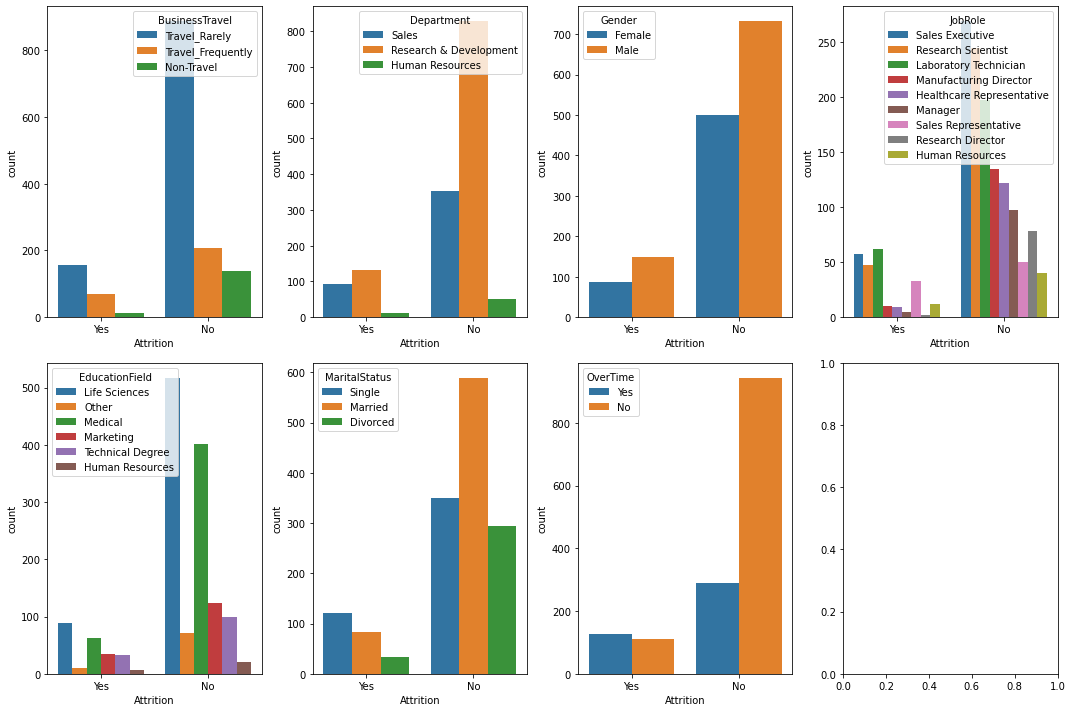

In [60]:
#visualize plots for categorical features 

# visualization for non numerical features
fig,axss = plt.subplots(2,4, figsize=[15,10])
sns.countplot(x='Attrition', hue='BusinessTravel', data=ibm_churn, ax=axss[0][0])
sns.countplot(x='Attrition', hue='Department', data=ibm_churn, ax=axss[0][1])
sns.countplot(x='Attrition', hue='Gender', data=ibm_churn, ax=axss[0][2])
sns.countplot(x='Attrition', hue='JobRole', data=ibm_churn, ax=axss[0][3])
sns.countplot(x='Attrition', hue='EducationField', data=ibm_churn, ax=axss[1][0])
sns.countplot(x='Attrition', hue='MaritalStatus', data=ibm_churn, ax=axss[1][1])
sns.countplot(x='Attrition', hue='OverTime', data=ibm_churn, ax=axss[1][2])
plt.tight_layout()
plt.savefig('categ_plots.png');

#### Feature Engineering: 

In [61]:
# tranform binary feature into 0 and 1
ibm_churn['Attrition'] = ibm_churn['Attrition'].map({'Yes': 1, 'No': 0})
ibm_churn['OverTime'] = ibm_churn['OverTime'].map({'Yes': 1, 'No': 0})

In [62]:
# check correlation between numerical features and target variable
corr_score = ibm_churn[['Age', 'DailyRate', 'DistanceFromHome', 'Education',
        'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
        'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
        'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
        'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
        'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition']].corr()
corr_score

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,-0.159205
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363,-0.056652
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,0.077924
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,-0.031373
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999,-0.103369
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123,-0.006846
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976,-0.130016
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281,-0.169105
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,0.000644,-0.055699,0.020002,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656,-0.103481
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,0.034814,0.149515,-0.027269,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079,-0.159840


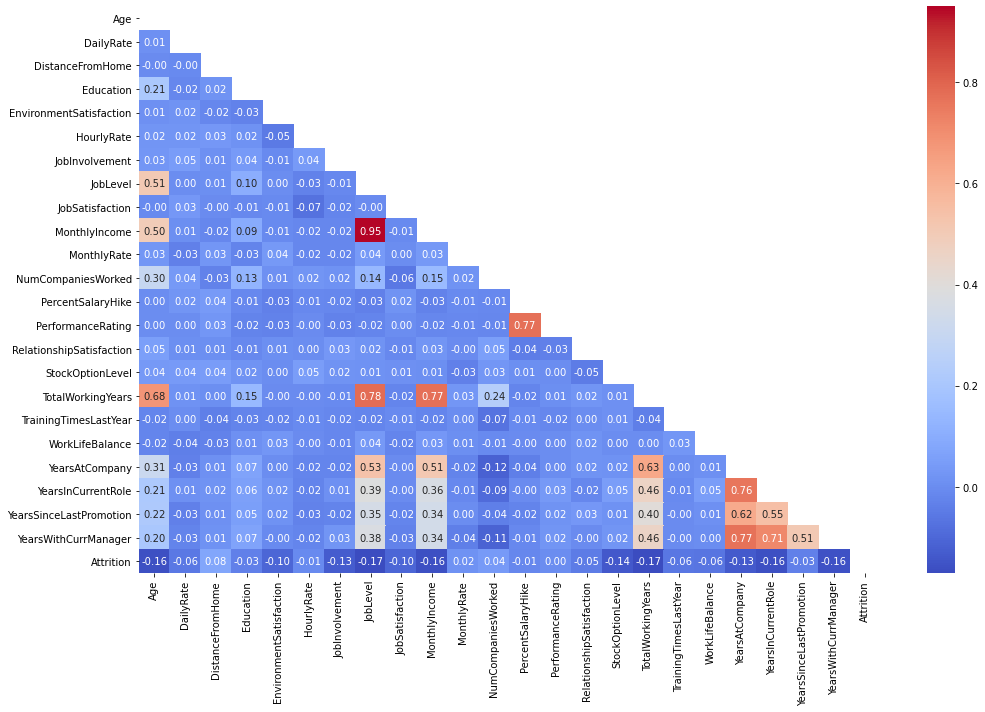

In [63]:
# visualization of correlation relationships
plt.figure(figsize=(15, 10))
mask = np.triu(corr_score)
sns.heatmap(corr_score,cmap="coolwarm",annot = True, fmt = '.2f',mask = mask)
plt.tight_layout()
plt.savefig('corr.png');

In [64]:
# Drop the target column and get a new dataframe with features
y = ibm_churn['Attrition']
ibm_new = ibm_churn.drop(columns = ['Attrition'])

In [65]:
# apply one hot encoding to categorical features
ibm_new = pd.get_dummies(ibm_new, columns = ['BusinessTravel', 'Gender','MaritalStatus'], drop_first = True)
ibm_new = pd.get_dummies(ibm_new)
ibm_new.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Gender_Male,MaritalStatus_Married,MaritalStatus_Single,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,49,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,27,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [66]:
# view columns made from feature engineering
print(list(ibm_new.columns))

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely', 'Gender_Male', 'MaritalStatus_Married', 'MaritalStatus_Single', 'Department_Human Resources', 'Department_Research & Development', 'Department_Sales', 'EducationField_Human Resources', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other', 'EducationField_Technical Degree', 'JobRole_Healthcare Representative', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Directo

In [67]:
ibm_new.shape

(1470, 47)

In [68]:
# filter out features that needs to be standarized
standard_col = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 
                   'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 
                   'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 
                   'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 
                   'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 
                   'YearsWithCurrManager']

In [69]:
# standardizing numerical features 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for col in standard_col:
    ibm_new[col] = ibm_new[col].astype(float)
    ibm_new[[col]] = scaler.fit_transform(ibm_new[[col]])
ibm_new.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Gender_Male,MaritalStatus_Married,MaritalStatus_Single,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,0.446350,0.742527,-1.010909,-0.891688,-0.660531,1.383138,0.379672,-0.057788,1.153254,-0.108350,0.726020,2.125136,1,-1.150554,-0.426230,-1.584178,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1.322365,-1.297775,-0.147150,-1.868426,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,-0.291719,1.488876,-0.678049,0,2.129306,2.346151,1.191438,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.008343,1.414363,-0.887515,-0.891688,1.169781,1.284725,-1.026167,-0.961486,0.246200,-0.937654,-1.674841,1.324226,1,-0.057267,-0.426230,-0.658973,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,-0.429664,1.461466,-0.764121,1.061787,1.169781,-0.486709,0.379672,-0.961486,0.246200,-0.763634,1.243211,-0.678049,1,-1.150554,-0.426230,0.266233,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,-1.086676,-0.524295,-0.887515,-1.868426,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,-0.644858,0.325900,2.525591,0,-0.877232,-0.426230,1.191438,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227,0,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


### Train test split

In [70]:
# split dataset into training set and testing set with stratified sampling so that each dataset 
#contains observations for both the churned and non-churned employees

from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(ibm_new,
                                                                    y,
                                                                    test_size=0.25,
                                                                    stratify = y)  
print('Training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('Test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

Training data has 1102 observation with 47 features
Test data has 368 observation with 47 features


In [121]:
# build classification model using logistic regression 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,roc_curve, roc_auc_score

lr = LogisticRegression(random_state = 32)


In [122]:
# Other models will be applied in the future 
#Now just setting up with logistic model (without hypertuning)

model_list = [lr]
score_res = []
for model in model_list:
    draft = model_selection.cross_val_score(model, X_train, y_train, cv = 5)
    score_res.append(draft)

In [123]:
# printing out performance score
model_names = ['Logistic Regression']
idx = ['cv_1','cv_2','cv_3','cv_4','cv_5']
df_accuracy = pd.DataFrame(np.array(score_res).T, columns = model_names, index = idx).round(decimals=3)
print('='*60)
print('The Score is listed below \n\n',df_accuracy)
print('='*60)

The Score is listed below 

       Logistic Regression
cv_1                0.860
cv_2                0.882
cv_3                0.891
cv_4                0.882
cv_5                0.864


In [124]:
# helper function to get best parameters from best performing model after grid search cross validation
best_models = []
def get_grid_res(gs):
    print("Best Score:", "{:.3f}".format(gs.best_score_))
    print("Best Parameters:")
    best_params = gs.best_params_
    for k, v in best_params.items():
        print(k, ":", v)

In [125]:
#k fold cross validation 
kfold = model_selection.KFold(n_splits=10, random_state = 32)

In [126]:
# hyperparameter tuning for logistic regression
lr_params = {'penalty':('l1', 'l2'), 
          'C':(0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10)}

In [127]:
# apply grid search on each hyperparameter and fit in with data
grid_lr = GridSearchCV(lr, lr_params, cv= kfold)
grid_lr.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=32, shuffle=False),
             estimator=LogisticRegression(random_state=32),
             param_grid={'C': (0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10),
                         'penalty': ('l1', 'l2')})

In [128]:
lr_res = grid_lr.cv_results_

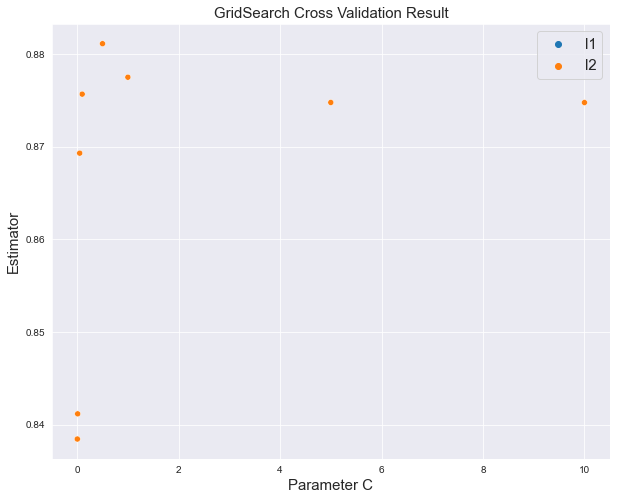

In [129]:
# visualize the affect of different hyperparameters on performance
sns.set_style('darkgrid')
plt.figure(figsize=(10, 8))
sns.scatterplot(x = 'param_C', y = 'mean_test_score',hue = 'param_penalty',data = lr_res)
plt.xlabel('Parameter C',fontsize = 15)
plt.ylabel('Estimator',fontsize = 15)
plt.title('GridSearch Cross Validation Result',fontsize = 15)
plt.legend(fontsize = 15)
plt.savefig('LR.png');

In [138]:
# apply helper function to get the best hyperparameter
get_grid_res(grid_lr)

Best Score: 0.881
Best Parameters:
C : 0.5
penalty : l2


In [139]:
best_lr_model = grid_lr.best_estimator_

In [140]:
# append the best model to a list in order to compare with other models later
best_models.append(('Logistic Regression', best_lr_model))

In [145]:
# helper function to print out and visualize the evaluation result of each model including
# confusion matrix, precison-recall and f1 score
def plot_cm(models):
    sns.set_style('white')
    class_names = ['No','Yes']
    for model_name, model in models:
        cm = confusion_matrix(y_test,model.predict(X_test))
        tn = cm[0][0]
        fp = cm[0][1]
        fn = cm[1][0]
        tp = cm[1][1]
        accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
        precision = tp / (tp + fp + 0.0)
        recall = tp / (tp + fn + 0.0)
        f1 = 2 / (( 1 / precision) + ( 1 / recall))
        plot_confusion_matrix(model, X_test, y_test,
                              display_labels=class_names,
                              cmap="Blues")
        plt.title(model_name, fontsize = 15)
        plt.ylabel('Actual',fontsize = 15)
        plt.xlabel('Predicted\nAccuracy = {}\nPrecision = {}\nRecall = {}\nF1 = {}'
                   .format((round(accuracy, 3)),round(precision, 3),round(recall, 3),round(f1, 3)), fontsize = 15)

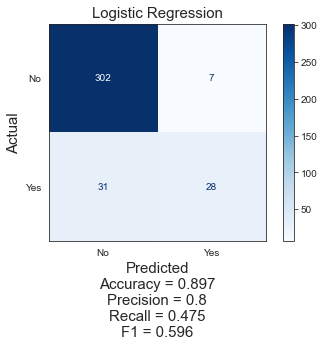

In [146]:
plot_cm(best_models)
plt.savefig('cm.png')

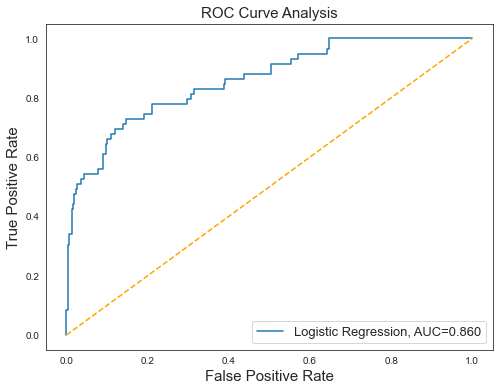

In [144]:
# visualize ROC curve for model
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
for model_name, model in best_models:
        yproba = model.predict_proba(X_test)[::,1]

        fpr, tpr, _ = roc_curve(y_test,  yproba)
        auc = roc_auc_score(y_test, yproba)
        result_table = result_table.append({'classifiers':model_name,
                                            'fpr':fpr, 
                                            'tpr':tpr, 
                                            'auc':auc}, ignore_index=True)

    # Setting the name of the classifiers as our index labels
result_table.set_index('classifiers', inplace=True)

plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0,1], [0,1], color='orange', linestyle='--')
plt.xlabel("False Positive Rate", fontsize=15)
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis',fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
plt.savefig('ROC.png');